In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import pi
import rain_data

%load_ext autoreload

%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
df = rain_data.load_data()

In [25]:
display(df)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,0.0,S,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,0,0,2
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,0.0,W,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,0,0,2
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,0.0,ESE,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,0,0,2
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,0.0,NNE,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,0,0,2
30180,2008-02-05,Sydney,19.7,25.7,77.4,6.8,0.0,NaN,0.0,NNE,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,...,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,0,0,6
33516,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,...,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,0,0,6
33517,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,...,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,0,0,6
33518,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,W,43.0,W,...,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,0,0,6


In [44]:
#[, , , , , , ,  , , , , , ],
#['W', 'WNW', 'SSW', 'S', 'E', 'ESE', 'SSE', 'NNW', 'N', 'WSW', 'SE', 'NNE', 'NW', 'NE', 'ENE', 'SW'],
#['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'SW', '']
wind_direct = ['N','NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW',  'WSW', 'W', 'WNW', 'NW', 'NNW']

3.141592653589793

In [260]:
df_wind_dir_morning = df['WindDir9am'].value_counts().reindex(wind_direct)
df_wind_dir_afternoon = df['WindDir3pm'].value_counts().reindex(wind_direct)



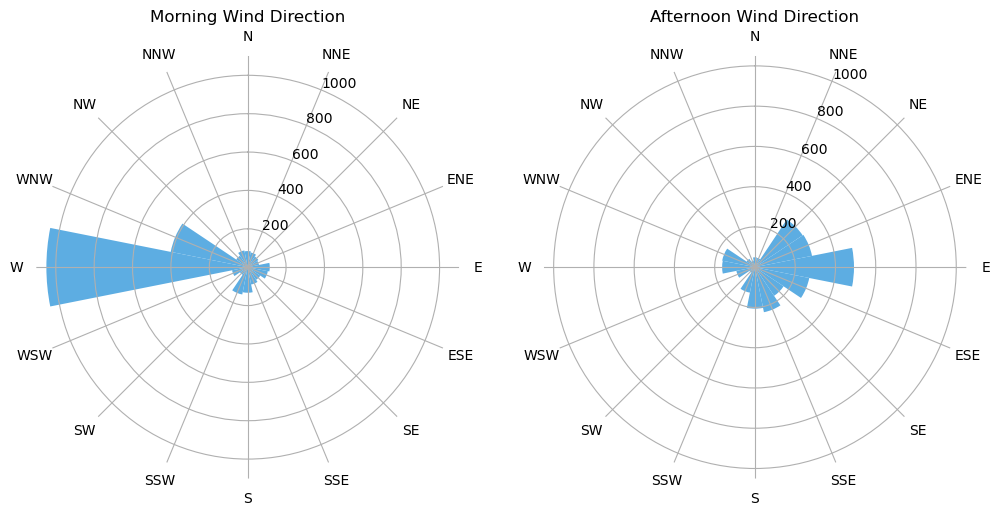

In [282]:
data_list = [df_wind_dir_morning, df_wind_dir_afternoon]
chart_titles = ['Morning Wind Direction', 'Afternoon Wind Direction']
data = df_wind_dir_morning
fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection':'polar'})
angles = np.arange(0,360,360/len(data))
heights = [1,2,5]
startangle =-22.5/2

for j, data in enumerate(data_list):
    for i, d in enumerate(data):
        x = (22.5 * pi *2)/ 360
        left = (startangle * pi *2)/ 360 #this is to control where the bar startsplt.xticks([])
        startangle += 22.5
        #left = 0 #this is to control where the bar startsplt.xticks([])
        ax[j].spines.clear()
        ax[j].barh(0, x, left=left, height=d, align='edge', label=data.index[i], color = '#5DADE2')
        ax[j].set_theta_offset(.5*pi)
        ax[j].set_theta_direction(-1)
        ax[j].set_thetagrids(angles, labels=df_wind_dir.index, fmt=None)
        ax[j].set_title(chart_titles[j])
        #plt.yticks([])
plt.ylim(-0, 1050)
fig.suptitle('Wind Direction in Sydney from ', fontsize=16)
plt.show()

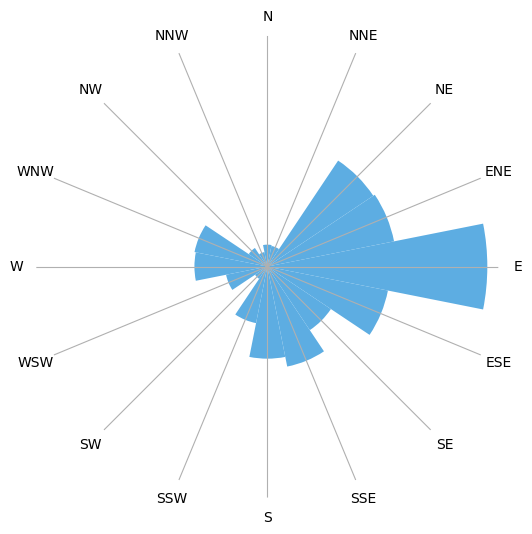

In [263]:
from math import pi
data = df_wind_dir_afternoon
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection':'polar'})
angles = np.arange(0,360,360/len(data))
heights = [1,2,5]
startangle =-22.5/2

for i, d in enumerate(data):
    x = (22.5 * pi *2)/ 360
    left = (startangle * pi *2)/ 360 #this is to control where the bar startsplt.xticks([])
    startangle += 22.5
    #left = 0 #this is to control where the bar startsplt.xticks([])
    plt.yticks([])
    ax.spines.clear()
    ax.barh(0, x, left=left, height=d, align='edge', label=data.index[i], color = '#5DADE2')
    ax.set_theta_offset(.5*pi)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(angles, labels=df_wind_dir.index, fmt=None)
#plt.ylim(-0, 1050)
plt.show()

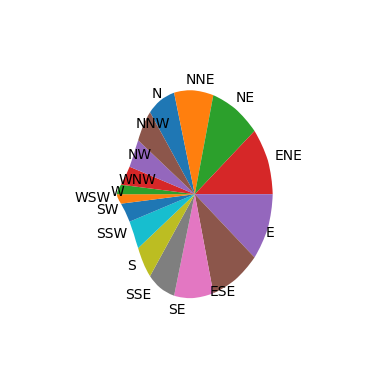

In [84]:

fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.pie(wind_direc_degs, labels=df_wind_dir.index, startangle=0)
plt.show()

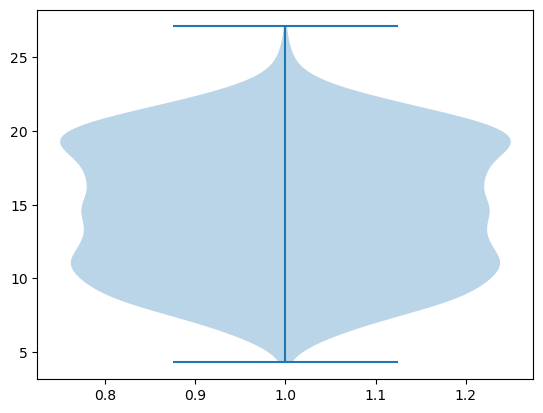

In [73]:
fig, ax = plt.subplots()
ax.violinplot(data['MinTemp'])
plt.show()

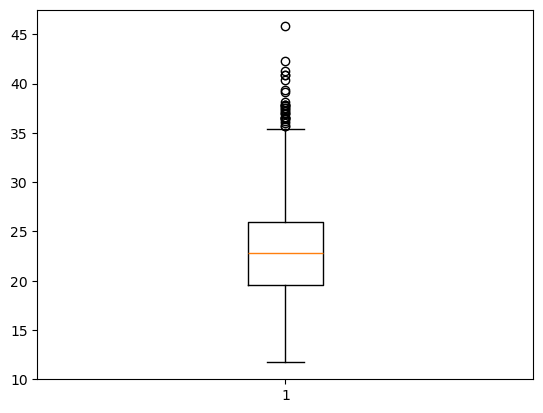

In [22]:
fig, ax = plt.subplots()
ax.boxplot(data['MaxTemp'])
plt.show()